# Essai apprentissage - 1 couche
Dataset prep : temporel + sans 4heure avant sans 4h apres

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda, Reshape, Permute
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,Adadelta,RMSprop
from keras.constraints import max_norm

# Training du fully connected sur le patient 1

In [2]:
x,y = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(1)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(1)+'_y_4hours.npy')
train_images, train_labels,test_images, test_labels = np.expand_dims(x[19075:],-1),to_categorical(y[19075:]),np.expand_dims(x[:19075],-1),to_categorical(y[:19075])

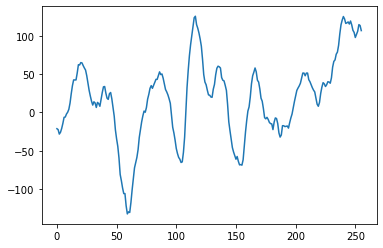

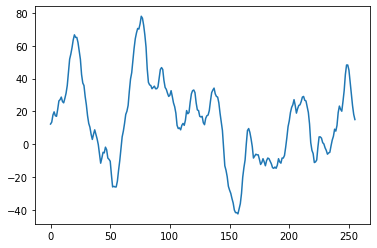

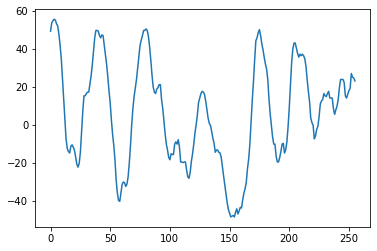

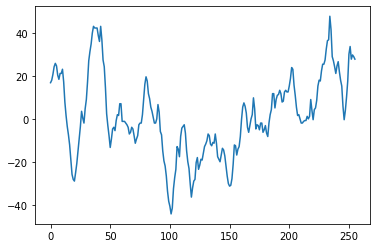

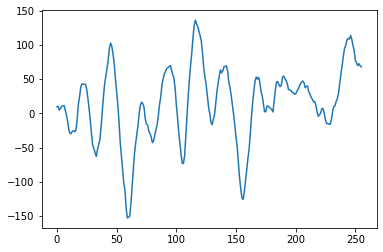

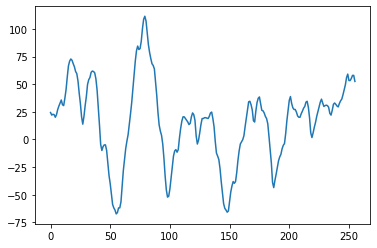

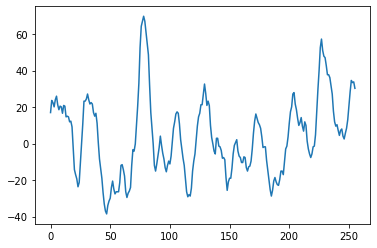

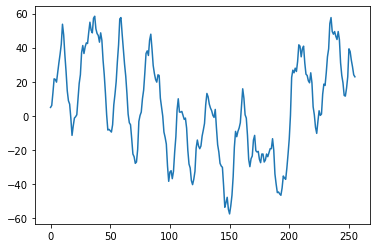

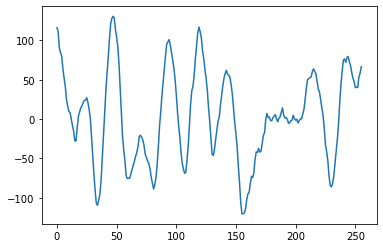

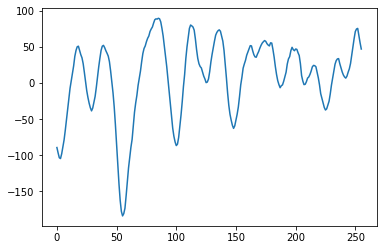

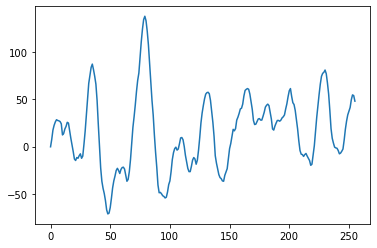

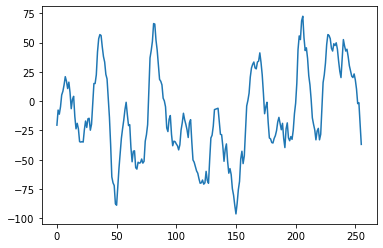

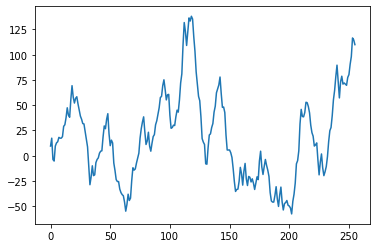

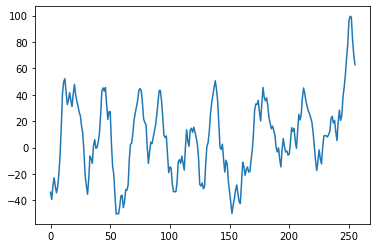

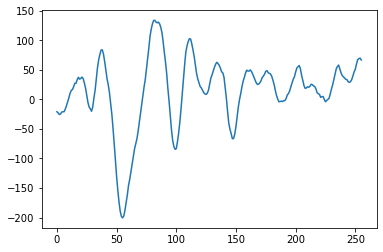

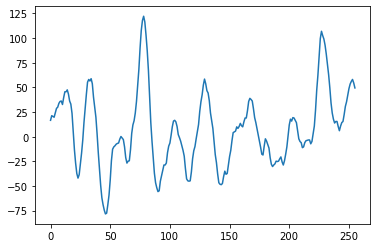

1


In [3]:
for i in range(16):
    plt.plot(x[1,:,i])
    plt.show()
print(y[1])

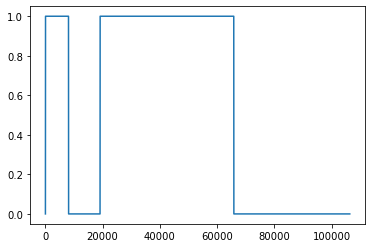

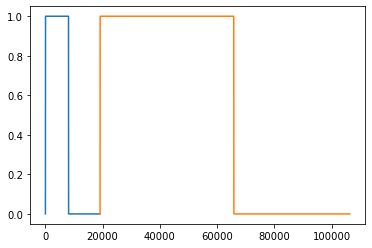

In [4]:
plt.plot(np.arange(0,len(y)),y)
plt.show()
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1])
plt.show()


In [5]:
shuffled_index_train =np.arange(0,len(train_labels))
np.random.shuffle(shuffled_index_train)
train_images, train_labels = train_images[shuffled_index_train,:,:,:],train_labels[shuffled_index_train,:]

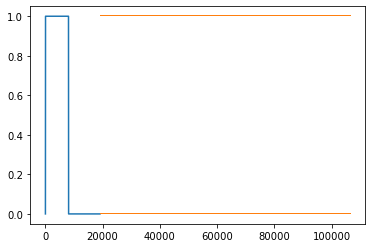

In [6]:
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1],',')
plt.show()

In [7]:
train_images.shape

(87273, 256, 16, 1)

In [8]:
model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu',name='dens0'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu',name='dens1'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32, activation='relu',name='dens2'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(16, activation='relu',name='dens3'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation='softmax',name='dens4'))




model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','AUC'])
model.evaluate(test_images,  test_labels, verbose=2)


2022-07-08 09:52:08.808616: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 09:52:09.376079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9554 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1


597/597 - 3s - loss: 19.0508 - accuracy: 0.5338 - auc: 0.5356 - 3s/epoch - 5ms/step


[19.05084228515625, 0.5338401198387146, 0.5355979204177856]

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dens0 (Dense)               (None, 512)               2097664   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dens1 (Dense)               (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dens2 (Dense)               (None, 32)                4

In [12]:


history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))


2022-07-07 17:31:25.909886: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1429880832 exceeds 10% of free system memory.
2022-07-07 17:31:26.956195: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1429880832 exceeds 10% of free system memory.


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_20349/1790715108.py", line 1, in <cell line: 1>
      history = model.fit(train_images, train_labels, epochs=20,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 864, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 2347, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.compat.v1.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_20349/1790715108.py", line 1, in <cell line: 1>
      history = model.fit(train_images, train_labels, epochs=20,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 864, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 2347, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.compat.v1.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential/dens4/Softmax:0) = ] [[nan nan][nan...]...] [y (Cast_4/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
	 [[assert_less_equal/Assert/AssertGuard/pivot_f/_13/_37]]
  (1) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential/dens4/Softmax:0) = ] [[nan nan][nan...]...] [y (Cast_4/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_4755]

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

#model.evaluate(test_images,  test_labels, verbose=2)


In [ ]:
for i in range(3):
    model.layers[i].trainable = False
model.summary()

# Transfert du modèle sur le patient 10

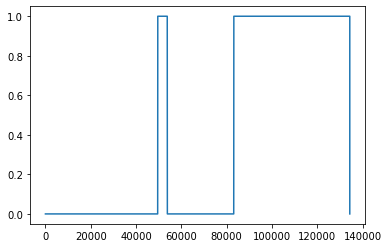

In [13]:
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(10)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(10)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [14]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-07 17:32:11.793901: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2200059904 exceeds 10% of free system memory.


InvalidArgumentError: Graph execution error:

Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_20349/1804853445.py", line 27, in <cell line: 27>
      model.evaluate(test_images,  test_labels, verbose=2)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1716, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1525, in test_function
      return step_function(self, iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1514, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1507, in run_step
      outputs = model.test_step(data)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1474, in test_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 2347, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.compat.v1.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_20349/1804853445.py", line 27, in <cell line: 27>
      model.evaluate(test_images,  test_labels, verbose=2)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1716, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1525, in test_function
      return step_function(self, iterator)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1514, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1507, in run_step
      outputs = model.test_step(data)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 1474, in test_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/metrics.py", line 2347, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "/home/thomas/anaconda3/envs/ts/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.compat.v1.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential/dens4/Softmax:0) = ] [[nan nan][nan...]...] [y (Cast_4/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
	 [[assert_less_equal/Assert/AssertGuard/pivot_f/_13/_37]]
  (1) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential/dens4/Softmax:0) = ] [[nan nan][nan...]...] [y (Cast_4/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_798]

In [ ]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:47000],x2[70000:])),np.concatenate((y2[:47000],y2[70000:])),x2[47000:70000,:,:],y2[47000:70000]


In [ ]:
plt.plot(np.arange(0,len(y2_train)),y2_train)
plt.show()
plt.plot(np.arange(0,len(y2_test)),y2_test)
plt.show()
plt.plot(np.concatenate((np.arange(0,len(y2))[:47000],np.arange(0,len(y2))[70000:])),np.concatenate((y2[:47000],y2[70000:])))
plt.plot(np.arange(0,len(y2))[47000:70000],y2[47000:70000])
plt.show()

In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.legend(loc='lower right')

# transfert du modele sur le patient 7

In [ ]:
n_patient = 7
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [ ]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

In [ ]:
x2_train, y2_train, x2_test, y2_test = x2[:153000],y2[:153000],x2[153000:],y2[153000:]


In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# Transfert sur patient 22

In [ ]:
n_patient = 22
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [ ]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

In [ ]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:30000],x2[55000:])),np.concatenate((y2[:30000],y2[55000:])),x2[30000:55000],y2[30000:55000]


In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# transfert sur patient 16

In [ ]:
n_patient = 16
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [ ]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

In [ ]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:15000],x2[22000:])),np.concatenate((y2[:15000],y2[22000:])),x2[15000:22000],y2[15000:22000]


In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')